In [2]:
# Make Validation samples
import mnist
import numpy as np
import codecs

test_images = mnist.test_images()
test_labels = mnist.test_labels()

testsamples = test_images.reshape(
    (test_images.shape[0], test_images.shape[1] * test_images.shape[2])
)

testlabels = np.zeros((10000,10), dtype=int)
for i in range(len(test_labels)):
    testlabels[i,test_labels[i]] = 1
    
invertdict={}
mydict = {}
for i in range(10):
    count = 0
    for n in range(len(testsamples)):
        if testlabels[n,i] == 1:
            count +=1
    mydict[str(i)] = count
    invertdict[str(i)] = len(testsamples) - count 
print(mydict)
print(invertdict)


{'0': 980, '1': 1135, '2': 1032, '3': 1010, '4': 982, '5': 892, '6': 958, '7': 1028, '8': 974, '9': 1009}
{'0': 9020, '1': 8865, '2': 8968, '3': 8990, '4': 9018, '5': 9108, '6': 9042, '7': 8972, '8': 9026, '9': 8991}


NameError: name 'testsamples' is not defined

In [36]:
out_len = 1
h2 = 10
h1 = 10
N= 1000

for i in range(1):
    with open('results/Integer_NN/'+str(N)+'/Architecture_Class_'+str(i)+'.txt','r') as f:
        reader = f.read()
        classifier = eval(reader)
    
        count_true = 0
        count_truepos = 0
        count_trueneg = 0

        count_false = 0
        count_falsepos = 0
        count_falseneg = 0

        for n in range(len(testsamples)):
            zeta1=np.zeros(h1)
            for r in range(h1):
                test1 = sum(testsamples[n,m] * classifier['w1'][(m,r)] for m in range(len(testsamples[0])))

                if test1 >= classifier['theta1'][r]:
                    zeta1[r] = 1

            zeta2 = np.zeros(h2)
            for s in range(h2): 
                test2 = sum(zeta1[r]*classifier['w2'][(r,s)] for r in range(h1))

                if test2 >= classifier['theta2'][s]:
                    zeta2[s] = 1

            test3 = sum(zeta2[s]* classifier['w3'][s] for s in range(h2))

            if test3 >= classifier['theta3'][0]:
                out = 1
            else:
                out = 0

            if out == testlabels[n,i]:
                count_true += 1
                if testlabels[n,i] == 1:
                    count_truepos +=1

                if testlabels[n,i] == 0:
                    count_trueneg +=1

            else:
                count_false += 1
                if testlabels[n,i] == 0:
                    count_falsepos +=1

                if testlabels[n,i] == 1:
                    count_falseneg +=1
            
            
    with codecs.open('results/Integer_NN/'+str(N)+'/validation/Validation_Class_'+str(i)+'.txt', 'w+', 'utf-8') as f:
        print("Validation results for >>Class "+ str(i) +"<<:\n\n"
              "No° of true samples: " + str(mydict[str(i)])+"\n"
              "No° of false samples: " + str(invertdict[str(i)])+"\n"
              "No° of true classifications: " + str(count_true)+"\n"
              "No° of false classifications: " + str(count_false)+"\n"
              "Prevalence: " + str(mydict[str(i)]/len(testsamples))+"\n"
              "Accuracy: " + str(count_true/len(testsamples))+"\n\n"

              "Confusion Matrix:\n"
              "     " + " Pos: " + "     " + " Neg: \n"
              " Pos  " + str(count_truepos) + "       " + str(count_falsepos)+"\n"
              " Neg  " + str(count_falseneg) + "       " + str(count_trueneg)+"\n\n"
        , file = f)
        

In [21]:
              "Some measures of goodness for the given NN: \n"
              "True Positive Rate (Recall): " + str(round(count_truepos/mydict[str(i)]*100 , 3)) + "%\n"
              "False Positive Rate (Fall-out): " + str(round(count_falsepos/invertdict[str(i)]*100 , 3))+"%\n"
              "False Negative Rate (Miss rate): " + str(round(count_falseneg/mydict[str(i)]*100 , 3)) + "% \n"
              "True Negative Rate (Specificity): " + str(round(count_trueneg/invertdict[str(i)]*100 , 3))+"%\n\n"

              "Positive Predictive Value (Precision): " + str(round(count_truepos/(count_truepos+count_falsepos)*100 , 3))+ "% \n"
              "False Discovery Rate: " + str(round(count_falsepos/(count_truepos+count_falsepos)*100 , 3))+ "% \n"
              "False Omission Rate: " + str(round(count_falseneg/(count_falseneg+count_trueneg)*100 , 3))+ "% \n"
              "Negative Predictive Value: " + str(round(count_trueneg/(count_falseneg+count_trueneg)*100 , 3))+ "% \n\n"

              "Final overall goodness measures:\n"
              "Positive Likelihood Ratio: " + str(round((count_truepos/mydict[str(i)])/(count_falsepos/invertdict[str(i)]) , 3)) + "\n"
              "Negative Likelihood Ratio: " + str(round((count_falseneg/mydict[str(i)])/(count_trueneg/invertdict[str(i)]), 3)) + "\n"
              "Diagnostic Odds Ratio: " + str(round(((count_truepos/mydict[str(i)])/(count_falsepos/invertdict[str(i)]))/((count_falseneg/mydict[str(i)])/(count_trueneg/invertdict[str(i)])) , 3)) + "\n\n"

              #"F1-Score: " + str(round(2*((count_truepos/(count_truepos+count_falsepos))*count_truepos/mydict[str(i)])/((count_truepos/(count_truepos+count_falsepos))+count_truepos/mydict[str(i)]) , 3)) + "\n\n\n"

             , file = f)
        
    truesamples = mydict[str(i)]
    falsesamples = invertdict[str(i)]
    totalpop = len(testsamples)
    truepred = count_true
    falsepred = count_false
    prevalence = truesamples/totalpop
    accuracy = count_true/totalpop
    truepos = count_truepos
    falsepos = count_falsepos
    falseneg = count_falseneg
    trueneg = count_trueneg
    recall = truepos/truesamples #TPR
    fallout = falsepos/falsesamples #FPR
    missrate = falseneg/truesamples #FNR
    specificity = trueneg/falsesamples #TNR
    totalpos = truepos + falsepos
    precision = truepos/totalpos
    FDR = falsepos/totalpos
    totalneg = trueneg+ falseneg
    FOR = falseneg/totalneg
    NPV = trueneg /totalneg
    LRpos = recall/fallout
    LRneg = missrate/specificity
    DOR = LRpos/LRneg
    f1 = 2* (precision * recall)/(precision + recall)

    dict_measures = {
        'truesamples' : mydict[str(i)],
        'falsesamples' : invertdict[str(i)],
        'totalpop' : len(testsamples),
        'truepred' : count_true,
        'falsepred' : count_false,
        'prevalence' : truesamples/totalpop,
        'accuracy' : count_true/totalpop,
        'truepos' :count_truepos,
        'falsepos' : count_falsepos,
        'falseneg' : count_falseneg,
        'trueneg' :count_trueneg,
        'recall' : truepos/truesamples,
        'fallout' : falsepos/falsesamples,
        'missrate' : falseneg/truesamples,
        'specificity' : trueneg/falsesamples,
        'totalpos' : truepos + falsepos,
        'precision' : truepos/totalpos,
        'FDR' : falsepos/totalpos,
        'totalneg' : trueneg+ falseneg,
        'FOR': falseneg/totalneg,
        'NPV' : trueneg /totalneg,
        'LRpos' : recall/fallout,
        'LRneg' : missrate/specificity,
        'DOR': LRpos/LRneg,
        #'f1' : 2* (precision * recall)/(precision + recall),
    }
    with open('results/Integer_NN/'+str(N)+'/validation/Validation_Class_'+str(i)+'_dict.txt', 'w+') as f:
        print(dict_measures, file = f)

ZeroDivisionError: division by zero

In [ ]:
i=3
with open('results/Integer_NN/'+str(N)+'/Architecture_Class_'+str(i)+'.txt','r') as f:
    reader = f.read()
    classifier = eval(reader)
    print(classifier['theta1'])

In [25]:
print("No° of true samples: " + str(mydict[str(i)])+"\n"
    "No° of false samples: " + str(invertdict[str(i)])+"\n"
    "No° of true classifications: " + str(count_true)+"\n"
    "No° of false classifications: " + str(count_false)+"\n"
    "Prevalence: " + str(mydict[str(i)]/len(testsamples))+"\n"
    "Accuracy: " + str(count_true/len(testsamples))+"\n\n"

    "Confusion Matrix:\n"
    "     " + " Pos: " + "     " + " Neg: \n"
    " Pos  " + str(count_truepos) + "       " + str(count_falsepos)+"\n"
    " Neg  " + str(count_falseneg) + "       " + str(count_trueneg)+"\n\n"

    "Some measures of goodness for the given NN: \n"
    "True Positive Rate (Recall): " + str(round(count_truepos/mydict[str(i)]*100 , 3)) + "%\n"
    "False Positive Rate (Fall-out): " + str(round(count_falsepos/invertdict[str(i)]*100 , 3))+"%\n"
    "False Negative Rate (Miss rate): " + str(round(count_falseneg/mydict[str(i)]*100 , 3)) + "% \n"
    "True Negative Rate (Specificity): " + str(round(count_trueneg/invertdict[str(i)]*100 , 3))+"%\n\n"
)


No° of true samples: 1010
No° of false samples: 8990
No° of true classifications: 1010
No° of false classifications: 8990
Prevalence: 0.101
Accuracy: 0.101

Confusion Matrix:
      Pos:       Neg: 
 Pos  1010       8990
 Neg  0       0

Some measures of goodness for the given NN: 
True Positive Rate (Recall): 100.0%
False Positive Rate (Fall-out): 100.0%
False Negative Rate (Miss rate): 0.0% 
True Negative Rate (Specificity): 0.0%




In [117]:

truesamples = mydict[str(i)]
falsesamples = invertdict[str(i)]
totalpop = len(testsamples)
truepred = count_true
falsepred = count_false
prevalence = truesamples/totalpop
accuracy = count_true/totalpop
truepos = count_truepos
falsepos = count_falsepos
falseneg = count_falseneg
trueneg = count_trueneg
recall = truepos/truesamples #TPR
fallout = falsepos/falsesamples #FPR
missrate = falseneg/truesamples #FNR
specificity = trueneg/falsesamples #TNR
totalpos = truepos + falsepos
precision = truepos/totalpos
FDR = falsepos/totalpos
totalneg = trueneg+ falseneg
FOR = falseneg/totalneg
NPV = trueneg /totalneg
LRpos = recall/fallout
LRneg = missrate/specificity
DOR = LRpos/LRneg
f1 = 2* (precision * recall)/(precision + recall)

dict_measures = {
    'truesamples' : mydict[str(i)],
    'falsesamples' : invertdict[str(i)],
    'totalpop' : len(testsamples),
    'truepred' : count_true,
    'falsepred' : count_false,
    'prevalence' : truesamples/totalpop,
    'accuracy' : count_true/totalpop,
    'truepos' :count_truepos,
    'falsepos' : count_falsepos,
    'falseneg' : count_falseneg,
    'trueneg' :count_trueneg,
    'recall' : truepos/truesamples,
    'fallout' : falsepos/falsesamples,
    'missrate' : falseneg/truesamples,
    'specificity' : trueneg/falsesamples,
    'totalpos' : truepos + falsepos,
    'precision' : truepos/totalpos,
    'FDR' : falsepos/totalpos,
    'totalneg' : trueneg+ falseneg,
    'FOR': falseneg/totalneg,
    'NPV' : trueneg /totalneg,
    'LRpos' : recall/fallout,
    'LRneg' : missrate/specificity,
    'DOR': LRpos/LRneg,
    'f1' : 2* (precision * recall)/(precision + recall),
}
with open('result'+str(i)+'_dict.txt', 'w+') as f:
    print(dict_measures, file = f)


In [17]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0])
test_images[0].shape

(28, 28)

First Layer Perception of Neurons for Class 0:


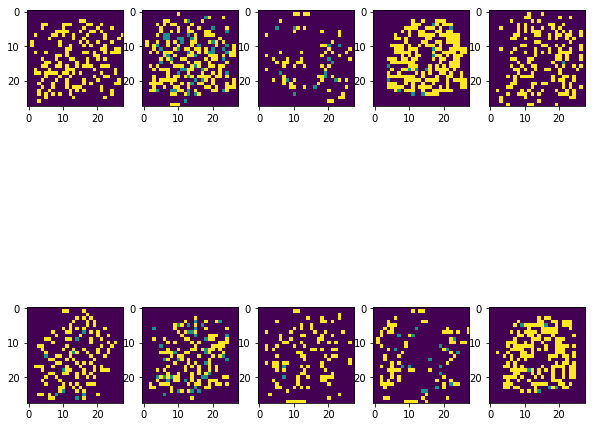

In [35]:
N=1000
for i in range(1):
    with open('results/Integer_NN/'+str(N)+'/Architecture_Class_'+str(i)+'.txt','r') as f:
        reader = f.read()
        classifier = eval(reader)
        schemalist = [[] for _ in range(10)]
        for key, val in classifier['w1'].items():
            for s in range(10):
                if int(key[1]) == s and val != 0:
                    schemalist[s].append((key[0],key[1],val))
        #print(schemalist, "\n")

        nvision = []
        for neuron in schemalist:
            perception = np.zeros((28,28))
            for n in neuron:
                perception[int(n[0]/28),n[0]%28] = n[2]
            nvision.append(perception)

        print("First Layer Perception of Neurons for Class "+ str(i)+":")
        fig=plt.figure(figsize=(10, 10))
        columns = 5
        rows = 2
        for l in range(1, columns*rows+1):
            fig.add_subplot(rows, columns, l)
            plt.imshow(nvision[l-1])
        plt.show()
        fig.savefig('results/Integer_NN/'+str(N)+'/validation/figs/INTEGER_NN_Class_'+str(i)+'.png', bbox_inches='tight')

First Layer Perception of Neurons for Class 5:


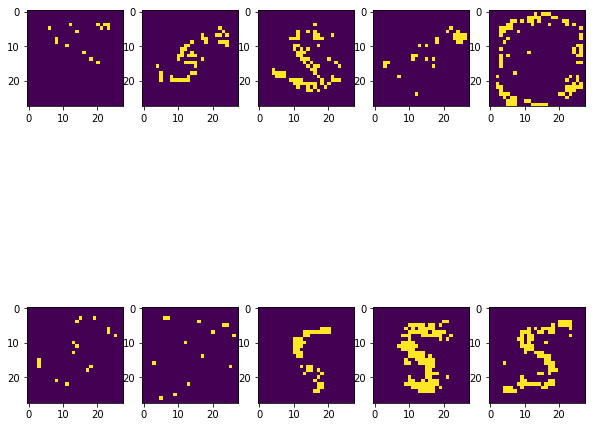

In [23]:
i = 5
schemalist = [[] for _ in range(10)]
for key, val in classifier[str(i)]['w1'].items():
    for s in range(10):
        if int(key[1]) == s and val != 0:
            schemalist[s].append((key[0],key[1],val))
#print(schemalist, "\n")

nvision = []
for neuron in schemalist:
    perception = np.zeros((28,28))
    for n in neuron:
        perception[int(n[0]/28),n[0]%28] = n[2]
    nvision.append(perception)

print("First Layer Perception of Neurons for Class "+ str(i)+":")
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 2
for l in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, l)
    plt.imshow(nvision[l-1])
plt.show()


In [24]:
i = 5
schemalist_w2 = []
for key, val in classifier[str(i)]['w2'].items():
    for s in range(10):
        if int(key[1]) == s and val != 0:
            schemalist_w2.append((key[0],key[1],val))

for i in range(10):
    for j in schemalist_w2:
        if i[1] == 
    print()

[(0, 2, 1.0), (1, 9, 1.0), (2, 9, 1.0), (3, 9, 1.0), (4, 4, 1.0), (5, 9, 1.0), (6, 9, 1.0), (7, 1, 1.0), (8, 9, 1.0), (9, 2, 1.0), (9, 9, 1.0)]

